In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(color_codes=True)

# Indices de confianza empresarial

In [2]:
ipe = pd.read_csv('ipe.csv', index_col='fecha', parse_dates=True, dayfirst=True)
ipe.tail()

,IPE,IPE NyEE,IPE Apoyo Emp.
fecha,,,
2020-03-01,-22.31,-23.12,-21.51
2020-06-01,-16.44,-13.35,-19.53
2020-09-01,-1.54,4.16,-7.23
2020-12-01,1.36,11.19,-8.46
2021-03-01,-0.40,10.39,-11.19


In [3]:
ipe.index

DatetimeIndex(['2017-09-01', '2017-12-01', '2018-03-01', '2018-06-01',
               '2018-09-01', '2018-12-01', '2019-03-01', '2019-06-01',
               '2019-09-01', '2019-12-01', '2020-03-01', '2020-06-01',
               '2020-09-01', '2020-12-01', '2021-03-01'],
              dtype='datetime64[ns]', name='fecha', freq=None)

In [4]:
ipec = pd.read_csv('ipe_comparado.csv', index_col='fecha', parse_dates=True, dayfirst=True)
ipec = ipec[['Nacional', 'Araucanía', 'Valparaíso (1)', 'Maule']]
ipec.tail()

,Nacional,Araucanía,Valparaíso (1),Maule
fecha,,,,
2021-02-01,9.014656,-19.4,NaN,-6.2
2021-03-01,6.794963,-24.5,9.2,-14.0
2021-04-01,-3.509817,-33.3,NaN,-9.0
2021-05-01,0.930573,-19.0,NaN,-3.0
2021-06-01,5.280328,-9.2,18.2,4.5


In [5]:
ipec = pd.concat([ipec, ipe], axis=1)
ipec = ipec.interpolate(limit_area='inside')
ipec['Nacional-m3'] = ipec['Nacional'].rolling(3).mean()

## Gráfico 1

IPEs junto al promedio móvil trimestral del ICE. Los IPEs fueron mensualizados usando interpolación lineal.

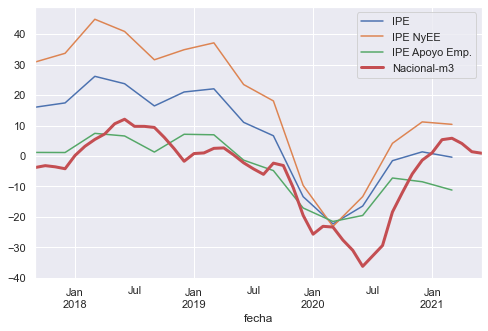

In [6]:
ipec[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':].plot(figsize=(8,5))
ipec['Nacional-m3']['2017-09':].plot(linewidth=3)
plt.legend()

## Gráfico 2

IPEs junto a todos los índices de confianza empresarial. Todos los índices fueron mensualizados usando interpolación lineal.

<AxesSubplot:xlabel='fecha'>

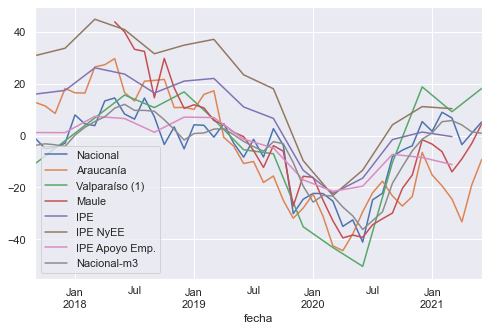

In [7]:
ipec['2017-09':].plot(figsize=(8,5))

## Gráfico 3

Heatmap de la matriz de correlaciones de los índices de confianza. Todos fueron mensualizados.

<AxesSubplot:>

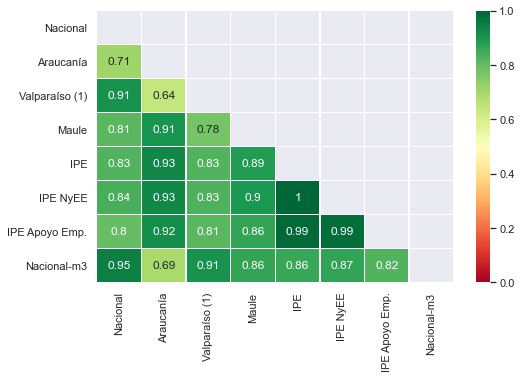

In [26]:
corr_mat = ipec.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
fig, ax =plt.subplots(figsize=(8,5))
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=0, vmax=1)

# Imacec

In [9]:
imacec = pd.read_csv('imacec.csv', index_col='fecha', parse_dates=True, dayfirst=True)
imacec = pd.concat([imacec, ipec[['IPE', 'IPE NyEE', 'IPE Apoyo Emp.']]], axis=1)
imacec.tail()

,Imacec,IPE,IPE NyEE,IPE Apoyo Emp.
fecha,,,,
2021-02-01,-2.08,0.186667,10.656667,-10.28
2021-03-01,5.77,-0.400000,10.390000,-11.19
2021-04-01,14.05,NaN,NaN,NaN
2021-05-01,18.10,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN


## Gráfico 4

IPEs junto a la tasa de crecimiento anual del IMACEC. Los IPEs fueron mensualizados usando interpolación lineal.

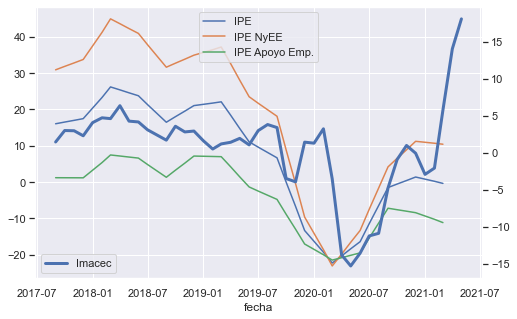

In [10]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(imacec[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper center')

ax2 = ax1.twinx()
ax2.plot(imacec['Imacec']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['Imacec'], loc='lower left')
ax2.grid(False)

## Gráfico 5

Heatmap de la matriz de correlaciones de los IPEs e Imacec. Los IPEs fueron mensualizados.

<AxesSubplot:>

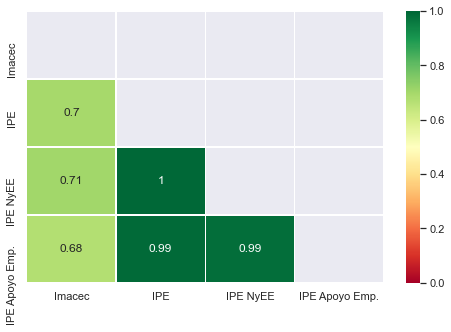

In [25]:
corr_mat = imacec.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
fig, ax =plt.subplots(figsize=(8,5))
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=0, vmax=1)

# Mercado laboral

In [12]:
laboral = pd.read_csv('laboral.csv', index_col='fecha', parse_dates=True, dayfirst=True)
laboral = pd.concat([laboral, ipec[['IPE', 'IPE NyEE', 'IPE Apoyo Emp.']]], axis=1)
laboral.tail()

,Desempleo,Ocupación (var 12 m),IPE,IPE NyEE,IPE Apoyo Emp.
fecha,,,,,
2021-02-01,10.304521,-9.883190,0.186667,10.656667,-10.28
2021-03-01,10.353810,-8.881472,-0.400000,10.390000,-11.19
2021-04-01,10.244367,-1.600329,NaN,NaN,NaN
2021-05-01,10.037301,7.926798,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN,NaN


## Gráfico 6

IPEs junto a la tasa de desempleo. Los IPEs fueron mensualizados usando interpolación lineal.

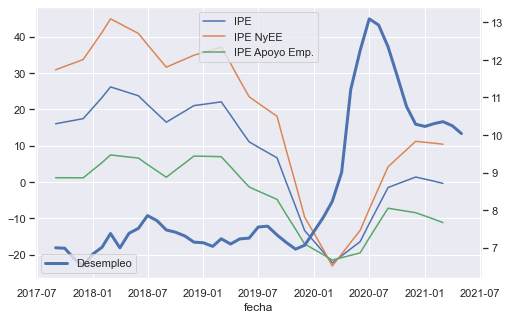

In [13]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(laboral[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper center')

ax2 = ax1.twinx()
ax2.plot(laboral['Desempleo']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['Desempleo'], loc='lower left')
ax2.grid(False)

## Gráfico 7

IPEs junto a la tasa de crecmiento anual del empleo. Los IPEs fueron mensualizados usando interpolación lineal.

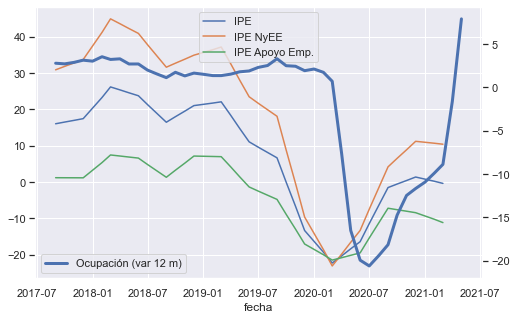

In [14]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(laboral[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper center')

ax2 = ax1.twinx()
ax2.plot(laboral['Ocupación (var 12 m)']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['Ocupación (var 12 m)'], loc='lower left')
ax2.grid(False)

# Cuentas nacionales

In [15]:
pib = pd.read_csv('pib.csv', index_col='fecha', parse_dates=True, dayfirst=True)
pib = pd.concat([pib, ipe], axis=1)
pib.tail()

,Inversión,PIB,IPE,IPE NyEE,IPE Apoyo Emp.
fecha,,,,,
2020-03-01,-0.035245,0.174888,-22.31,-23.12,-21.51
2020-06-01,-19.791276,-14.248627,-16.44,-13.35,-19.53
2020-09-01,-17.044427,-8.998803,-1.54,4.16,-7.23
2020-12-01,-8.874323,0.005533,1.36,11.19,-8.46
2021-03-01,0.707847,0.336582,-0.40,10.39,-11.19


## Gráfico 8

IPEs junto a la tasa de crecimiento anual de la inversión (respecto al mismo periodo del año anterior).

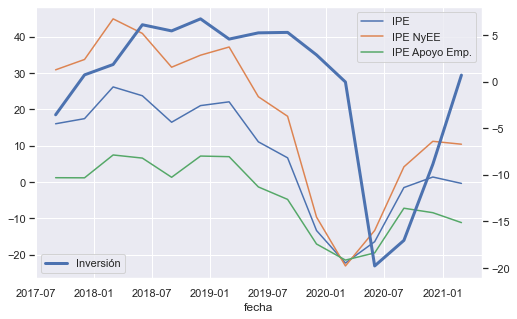

In [16]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(pib[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper right')

ax2 = ax1.twinx()
ax2.plot(pib['Inversión']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['Inversión'], loc='lower left')
ax2.grid(False)

## Gráfico 9

IPEs junto a la tasa de crecimiento anual del PIB (respecto al mismo periodo del año anterior).

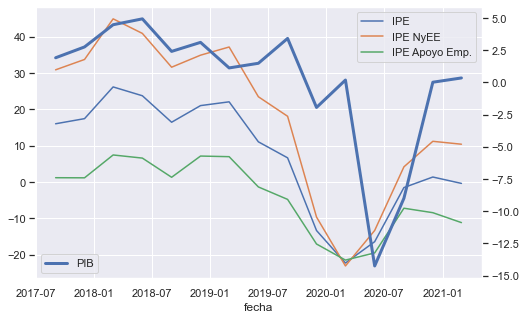

In [17]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(pib[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper right')

ax2 = ax1.twinx()
ax2.plot(pib['PIB']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['PIB'], loc='lower left')
ax2.grid(False)

# Comercio

In [18]:
comercio = pd.read_csv('comercio.csv', index_col='fecha', parse_dates=True, dayfirst=True)
comercio = pd.concat([comercio, ipec[['IPE', 'IPE NyEE', 'IPE Apoyo Emp.']]], axis=1)
comercio.tail()

,Índice de ventas CNC,IAC INE,IPE,IPE NyEE,IPE Apoyo Emp.
fecha,,,,,
2021-02-01,-6.372258,3.668532,0.186667,10.656667,-10.28
2021-03-01,-3.905562,23.456451,-0.400000,10.390000,-11.19
2021-04-01,-0.922617,43.261713,NaN,NaN,NaN
2021-05-01,78.792576,72.112511,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN,NaN


## Gráfico 10

IPEs junto a índice de ventas del comercio de la CNC.

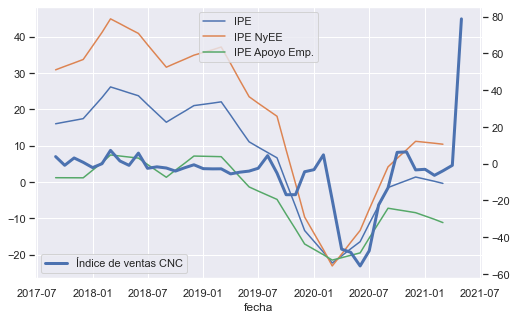

In [19]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(comercio[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper center')

ax2 = ax1.twinx()
ax2.plot(comercio['Índice de ventas CNC']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['Índice de ventas CNC'], loc='lower left')
ax2.grid(False)

## Gráfico 11

IPEs junto a índice de actividad del comercio del INE.

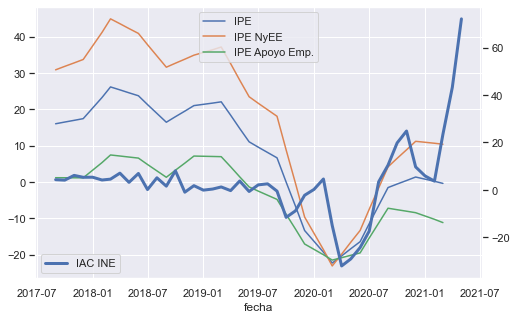

In [20]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(comercio[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper center')

ax2 = ax1.twinx()
ax2.plot(comercio['IAC INE']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['IAC INE'], loc='lower left')
ax2.grid(False)

# Deuda

In [67]:
deuda = pd.read_csv('deuda.csv', index_col='fecha', parse_dates=True, dayfirst=True)
deuda = deuda[['Micro', 'Pequeño', 'Mediano', 'Grande', 'Mega']].pct_change(12)
deuda = pd.concat([deuda, ipec[['IPE', 'IPE NyEE', 'IPE Apoyo Emp.']]], axis=1)
deuda.tail()

,Micro,Pequeño,Mediano,Grande,Mega,IPE,IPE NyEE,IPE Apoyo Emp.
fecha,,,,,,,,
2021-02-01,1.952894,0.594517,-0.016895,-0.222206,-0.328086,0.186667,10.656667,-10.28
2021-03-01,3.273271,1.459450,0.959866,0.236778,-0.363911,-0.400000,10.390000,-11.19
2021-04-01,0.560683,0.655507,0.162255,0.151825,-0.129443,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Gráfico 12

Matriz de correlaciones IPEs y tasa de crecimiento anual de la deuda de empresas.

<AxesSubplot:>

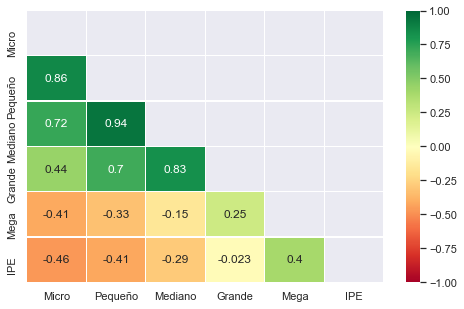

In [68]:
corr_mat = deuda[['Micro', 'Pequeño', 'Mediano', 'Grande', 'Mega', 'IPE']].corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
fig, ax =plt.subplots(figsize=(8,5))
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=-1, vmax=1)

# Remuneraciones

In [88]:
rem = pd.read_csv('remuneraciones.csv', na_values='-')
rem['fecha'] = pd.to_datetime(rem[['year', 'month']].assign(DAY=1))
rem.tail()

,year,month,Tamaño,Glosa,Índice,Variación Mensual,Variación Acumulada,Variación en 12 Meses,Incidencia Mensual,Incidencia Acumulada,Incidencia a 12 Meses,fecha
187,2021,3,2,Mediana,129.47,1.1,2.8,5.7,0.211,0.533,1.082,2021-03-01
188,2021,3,3,Grande,122.84,1.3,2.1,4.2,0.816,1.340,2.700,2021-03-01
189,2021,4,1,Pequeña,128.26,-1.6,0.4,4.7,-0.268,0.072,0.800,2021-04-01
190,2021,4,2,Mediana,130.46,0.8,3.6,7.4,0.147,0.684,1.418,2021-04-01
191,2021,4,3,Grande,123.25,0.3,2.4,5.6,0.213,1.557,3.598,2021-04-01


In [92]:
crem = pd.pivot_table(data=rem, index='fecha', columns='Glosa', values='Variación en 12 Meses')
crem = pd.concat([crem, ipec[['IPE', 'IPE NyEE', 'IPE Apoyo Emp.']]], axis=1)
crem.tail()

,Grande,Mediana,Pequeña,IPE,IPE NyEE,IPE Apoyo Emp.
fecha,,,,,,
2021-02-01,4.1,6.0,2.3,0.186667,10.656667,-10.28
2021-03-01,4.2,5.7,3.4,-0.400000,10.390000,-11.19
2021-04-01,5.6,7.4,4.7,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN,NaN,NaN


## Gráfico 13
Heatmap de correlaciones entre tasa de crecimiento anual de remuneraciones, según tamaño de empresa, e IPE.

<AxesSubplot:>

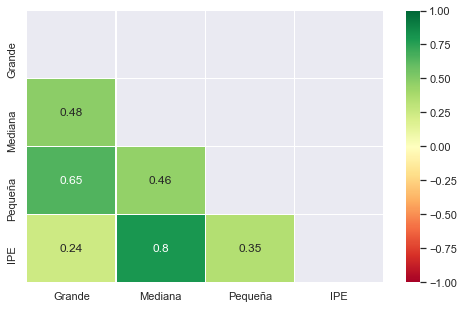

In [95]:
corr_mat = crem[['Grande', 'Mediana', 'Pequeña', 'IPE',]].corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
fig, ax =plt.subplots(figsize=(8,5))
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=-1, vmax=1)

## Gráfico 14
Tasa de crecimiento anual de remuneraciones de empresas medianas e IPEs.

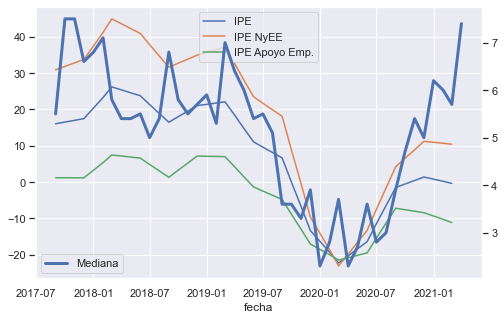

In [97]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(crem[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper center')

ax2 = ax1.twinx()
ax2.plot(crem['Mediana']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['Mediana'], loc='lower left')
ax2.grid(False)

# Costo mano de obra

In [99]:
mob = pd.read_csv('mobra.csv', na_values='-')
mob['fecha'] = pd.to_datetime(mob[['year', 'month']].assign(DAY=1))
mob.tail()

,year,month,Tamaño,Glosa,Índice,Variación Mensual,Variación Acumulada,Variación en 12 Meses,Incidencia Mensual,Incidencia Acumulada,Incidencia a 12 Meses,fecha
187,2021,3,2,Mediana,130.30,1.3,2.9,6.5,0.246,0.552,1.228,2021-03-01
188,2021,3,3,Grande,123.89,1.6,1.8,5.0,1.052,1.185,3.238,2021-03-01
189,2021,4,1,Pequeña,127.62,-1.8,0.3,5.5,-0.303,0.044,0.901,2021-04-01
190,2021,4,2,Mediana,130.70,0.3,3.2,7.8,0.059,0.611,1.481,2021-04-01
191,2021,4,3,Grande,123.89,0.0,1.8,6.1,0.000,1.185,3.906,2021-04-01


In [100]:
cmob = pd.pivot_table(data=mob, index='fecha', columns='Glosa', values='Variación en 12 Meses')
cmob = pd.concat([cmob, ipec[['IPE', 'IPE NyEE', 'IPE Apoyo Emp.']]], axis=1)
cmob.tail()

,Grande,Mediana,Pequeña,IPE,IPE NyEE,IPE Apoyo Emp.
fecha,,,,,,
2021-02-01,4.9,6.7,3.1,0.186667,10.656667,-10.28
2021-03-01,5.0,6.5,4.5,-0.400000,10.390000,-11.19
2021-04-01,6.1,7.8,5.5,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN,NaN,NaN


## Gráfico 15
Heatmap de correlaciones entre tasa de crecimiento anual del costo de la mano de obra, según tamaño de empresa, e IPE.

<AxesSubplot:>

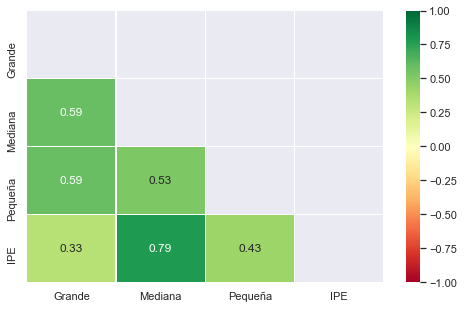

In [101]:
corr_mat = cmob[['Grande', 'Mediana', 'Pequeña', 'IPE',]].corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
fig, ax =plt.subplots(figsize=(8,5))
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=-1, vmax=1)

## Gráfico 16
Tasa de crecimiento anual del costo de la mano de obra de empresas medianas e IPEs.

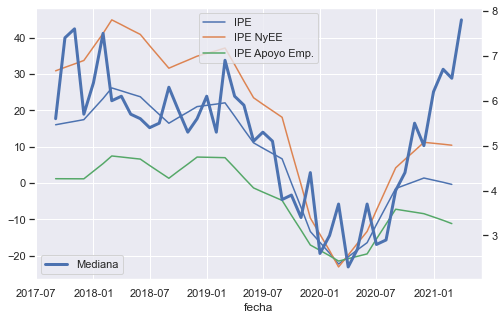

In [103]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(cmob[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper center')

ax2 = ax1.twinx()
ax2.plot(cmob['Mediana']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['Mediana'], loc='lower left')
ax2.grid(False)